#### [Statistics analysis](https://www.scribbr.com/statistics/statistical-tests/)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)
- [T检验](#t-test)  
    单样本t检验和独立两样本t检验
- [卡方检验](#chi-squared-test)

#### [最小二乘法(OLS)](#ols)
- statsmodels.formula.api

#### Seaborn
- [Visualizing linear relationships](https://www.cntofu.com/book/172/docs/6.md)  
    regplot() and lmplot()

<div id='t-test'></div>

#### T test

>A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

**When to use a t-test?**

A t-test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.

The t-test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. ***The t-test assumes your data:***
- are independent
- are (approximately) normally distributed.
- have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

If your data do not fit these assumptions, you can try a nonparametric alternative to the t-test, such as the Wilcoxon Signed-Rank test for data with unequal variances.

**What type of t-test should I use?**  
(One-sample, two-sample, or paired t-test)
- If the groups come from a single population (e.g. measuring before and after an experimental treatment), perform a ***paired t-test***.
- If the groups come from two different populations (e.g. two different species, or people from two separate cities), perform a ***two-sample t-test*** (a.k.a. independent t-test).
- If there is one group being compared against a standard value (e.g. comparing the acidity of a liquid to a neutral pH of 7), perform a ***one-sample t-test***.


t检验（t test）又称学生t检验（Student t-test）可以说是统计推断中非常常见的一种检验方法，用于统计量服从正态分布，但方差未知的情况。有关t检验的历史（以及学生t检验的由来）可以参考[维基百科](https://en.wikipedia.org/wiki/Student's_t-test#History)。

t检验的前提是要求样本服从正态分布或近似正态分布。若不满足这一条件，则可以利用一些变换（取对数、开根号、倒数等等）试图将其转化为服从正态分布的数据。如若还是不满足正态分布，只能利用非参数检验方法。不过当样本量大于30的时候，可以认为数据近似正态分布。

t检验最常见的四个用途：
- 单样本均值检验（One-sample t-test）  
    用于检验总体方差未知、正态数据或近似正态的单样本的均值是否与已知的总体均值相等
- 独立两样本均值检验（Independent two-sample t-test）  
    用于检验两组独立的正态数据或近似正态的样本的均值是否相等，这里可根据总体方差是否相等分类讨论
- 配对样本均值检验（Dependent t-test for paired samples）  
    用于检验一对配对样本的均值的差是否等于某一个值
- 回归系数的显著性检验（t-test for regression coefficient significance）  
    用于检验回归模型的解释变量对被解释变量是否有显著影响

T检验的相关学习资料：
- [方差分析、T检验、卡方分析如何区分](https://zhuanlan.zhihu.com/p/57756620)
- [三种T检验的详细区分](https://zhuanlan.zhihu.com/p/68736699)
- [一文详解t检验](https://zhuanlan.zhihu.com/p/138711532)

#### Performing a t-test

**单样本T检验**：

检验原假设：样本均值无差异(μ=μ0)

Python命令：`scipy.stats.ttest_1samp(a=Sample observation, popmean=Expected value in null hypothesis)`

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意ttest_1samp进行双侧检验。

In [132]:
import numpy as np
import pandas as pd
from scipy import stats

# T test
data = pd.DataFrame({'x': np.random.normal(size = 100)})
stats.ttest_1samp(data['x'], 0)
# if p-value < 0.05, we could reject H0

Ttest_1sampResult(statistic=0.5885885747784004, pvalue=0.5574778085960583)

In [133]:
data['x'].mean()

0.055950717471077056

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

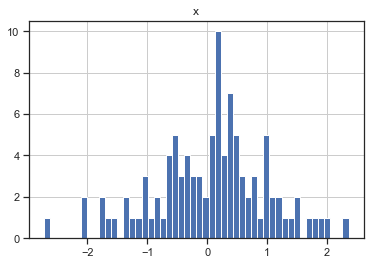

In [134]:
# pd.DataFrame({'x': np.random.normal(size = 100)}).hist(bins = 50)
data.hist(bins = 50)  ## 绘制直方图

**独立两样本T检验**：

两样本t检验是比较两个样本所代表的两个总体均值是否存在显著差异。

检验原假设：样本均值无差异(μ=μ0)

Python命令：`stats.ttest_ind(data1,data2)`

<AxesSubplot:>

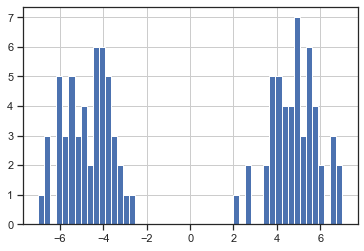

In [136]:
x1 = 5 + np.random.normal(size = 50)
x2 = -5 + np.random.normal(size = 50)
data['y'] = np.concatenate((x1, x2)) ## np.concatenate 连接两个数组
data['y'].hist(bins = 50)

In [137]:
data['y'].mean()

0.02115166912075966

In [138]:
stats.ttest_1samp(data['y'], 0)

Ttest_1sampResult(statistic=0.04284676042819534, pvalue=0.965909987512011)

两样本t检验除了要求样本来自正态分布，还要求两个样本的总体方差相等也就是“方差齐性”。  
因此当不确定两总体方差是否相等时，应先利用levene检验`stats.levene(data1,data2)`检验两总体是否具有方差齐性。  

如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。  
如果两总体不具有方差齐性，则需要在ttest_ind()函数中加上参数equal_val并设定为False，即：`stats.ttest_ind(data1,data2,equal_var=False)`


In [139]:
stats.levene(x1,x2)

LeveneResult(statistic=0.08423734123480506, pvalue=0.7722484173059848)

In [140]:
stats.ttest_ind(x1,x2)
# if p-value < 0.05, the H0 could be rejected, which means x1 is not equal to x2

Ttest_indResult(statistic=44.52697082908188, pvalue=7.830596640659706e-67)

**配对T检验**

配对样本均数T检验简称配对T检验(paired t test), 又称非独立两样本均数t检验，适用于配对设计计量资料均数的比较，其比较目的是检验**两相关样本**均数所代表的未知总体均数是否有差别。与独立样本T检验相比，配对样本T检验要求样本是配对的。两个样本的样本量要相同；样本先后的顺序是一一对应的。

检验原假设：样本均值无差异(μ=μ0)

Python命令：`stats.ttest_rel(data1,data2)`

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意stats.ttest_rel进行双侧检验。

In [142]:
from scipy import stats
data1 = [23,20,18,29,43,35,32,40,29,26,24,26]
data2 = [1000,1000,500,500,500,100,100,100,100,100,100,100]
stats.ttest_rel(data1,data2)

Ttest_relResult(statistic=-3.149034903041314, pvalue=0.009258094005021552)

<div id='chi-squared-test'></div>

#### Chi-Squared Test

>卡方检验（Chi-Squared Test）是一种统计量的分布在零假设成立时近似服从卡方分布的假设检验。在没有其他的限定条件或说明时，卡方检验一般指代的是皮尔森卡方检验。在卡方检验的一般运用中，研究人员将观察量的值划分成若干互斥的分类，并且使用一套理论（或零假设）尝试去说明观察量的值落入不同分类的概率分布的模型。而卡方检验的目的就在于去衡量这个假设对观察结果所反映的程度。

    注意：卡方检验仅针对分类变量

**卡方分布：** 若$n$个相互独立的随机变量，均服从标准正态分布，则这$n$个服从标准正态分布的随机变量的平方和构成一新的随机变量，其分布规律称为卡方分布$X^2$

**皮尔森卡方检验：**  
皮尔森卡方检验可用于两种情境的变项比较：***拟合优度检验***和***独立性检验***。
- 拟合优度检验(Goodness of Fit test)：验证一组观察值的次数分配是否异于理论上的分配。  
- 独立性检验：验证从两个变量抽出的配对观察值组是否互相独立。

卡方检验的三个步骤：
- 计算卡方检验的统计值：把每一个观察值和理论值的差做平方后、除以理论值、再加总。
- 计算统计值的自由度。
- 依据研究者设定的置信水平（显著性水平、P值或对应Alpah值），推论能否拒绝零假设。

卡方检验的相关学习资料：
- [卡方检验（Chi-Squared Test）](https://zhuanlan.zhihu.com/p/56423752)
- [卡方检验、T检验+F检验、方差分析、Z检验](https://www.jianshu.com/p/8b7b401881d7)
- [卡方检验](https://zh.wikipedia.org/wiki/%E5%8D%A1%E6%96%B9%E6%A3%80%E9%AA%8C)


Python命令：
- 拟合优度检验：`stats.chisquare(f_obs = Observed frequencies in each category, f_exp = Expected frequencies in each category)`  
- 独立性检验：`stats.chi2_contingency(observed = The contingency table)`

检验原假设：观察频数与期望频数无显著差异  
结果解释：当p值小于某个显著性水平α(比如0.05)时，则拒绝原假设，认为两个样本有显著差异。

**拟合优度检验举例**

某科学家预言抛一个色子，各面向上的几率都相同。为了验证自己理论的正确性，该科学家抛了600次硬币，结果为一点102次，二点102次，三点96次，四点105次，五点95次，六点100次。显然这个结果和理论预期并不完全一样，那么，科学家的理论有错吗？

In [4]:
from scipy import stats

obs = [102, 102, 96, 105, 95, 100]
exp = [100, 100, 100, 100, 100, 100]
stats.chisquare(obs, f_exp = exp)

Power_divergenceResult(statistic=0.74, pvalue=0.980701472519648)

从结果来看，p值为0.98，可以认为观测到的值和预期值是相近的。科学家的理论没有错，观测值和理论值的不同是由偶然误差造成的。

**独立性检验举例**

从某中学随机抽取两个班，调查他们对待文理分科的态度，结果，甲班37人赞成，27人反对；乙班39人赞成，21人反对，这两个班对待文理分科的态度是否有显著差异(α= .05)?

|   |  赞成   | 反对  |
|--|  ----  | ----  |
|甲班| 37  | 27 |
|乙班| 39  | 21 |

In [13]:
from scipy import stats
import numpy as np

kf_data = np.array([[37,27], [39,21]])
g, p, dof, expctd = stats.chi2_contingency(kf_data)
g, p

(0.40538080226608214, 0.5243233881944427)

结论: 因为p值=0.5243>0.05, 故接受原假设, 认为这两个班对待文理分科的态度无显著差别。

<div id='ols'></div>

#### 最小二乘法（least sqaure method）

最小二乘法的主要思想是通过确定未知参数（通常是一个参数矩阵），来使得真实值和预测值的误差（也称残差）平方和最小：  
已知 $目标函数 = \sum(观测值-期望值)^2$，求 $min(目标函数)$

参考资料：
- [最小二乘法](https://zhuanlan.zhihu.com/p/38128785)
- [OLS在python中的四种实现方式](https://zhuanlan.zhihu.com/p/35460377)

**OLS应用举例：简单线性回归**

给定两组观测值x和y，我们要检验以下假设：y是x的线性函数。换句话说：  
$y = x * coef + intercept + e$  
其中e是观察噪声。我们将使用statsmodels模块执行以下操作：
1. 拟合线性模型。使用最简单的策略，即普通最小二乘法（OLS）。
2. 测试coef不为零。

首先，我们根据模型生成模拟数据：

In [5]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

然后我们指定一个OLS模型并拟合它：

In [6]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()

我们可以检查从拟合得出的各种统计信息：

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           8.56e-08
Time:                        21:50:09   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

表中coef列为拟合结果，可通过params属性输出

In [8]:
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


<AxesSubplot:xlabel='x', ylabel='y'>

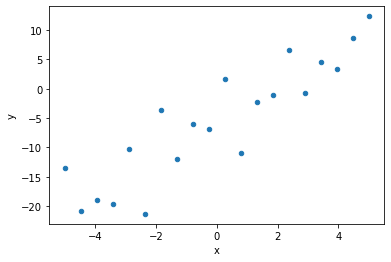

In [9]:
#### 根据dataframe绘制散点图

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') ## 设置日志仅显示error级别的通知

# data['yf']=model.fittedvalues
data[['x','y']].plot('x', 'y', kind = 'scatter') ## 绘制散点图

<AxesSubplot:xlabel='x', ylabel='y'>

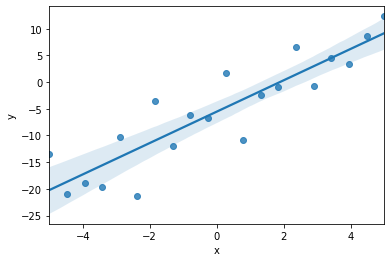

In [10]:
#### 线性关系的可视化
import seaborn as sns

# sns.lmplot(y='y', x='x', data=data)
sns.regplot(y='y', x='x', data=data)

考虑线性回归的如下形式：
$$Y = \beta X+ \epsilon$$
OLS对于普通最小二乘的估计为：
$$\beta = (X^TX)^{-1}X^TY$$

**Exercise:**
    阅读下面的代码，理解如何通过代码实现OLS。

In [68]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

#### 最小二乘法的代码实现
def simple_ols(y,x):

    x = np.c_[np.ones(x.shape[0]),x]
    inv_xx = np.linalg.inv(np.dot(x.T,x))
    b = np.dot(inv_xx, np.dot(x.T,y)) 

    nobs = y.shape[0]                     # number of observations
    ncoef = x.shape[1]                    # number of coef.
    df_e = nobs - ncoef              # degrees of freedom, error 
    df_r = ncoef - 1                      # degrees of freedom, regression 

    e = y - np.dot(x,b)            # residuals
    sse = np.dot(e,e)/df_e         # Sum Squared Error，误差平方和
    se = np.sqrt(np.diagonal(sse*inv_xx))  # coef. standard errors
    
    import scipy
    
    t = b / se                       # coef. t-statistics
    p = (1-scipy.stats.t.cdf(abs(t), df_e)) * 2    # coef. p-values

    R2 = 1 - e.var()/y.var()         # model R-squared
    R2adj = 1-(1-R2)*((nobs-1)/(nobs-ncoef))   # adjusted R-square

    F = (R2/df_r) / ((1-R2)/df_e)  # model F-statistic
    Fpv = 1-scipy.stats.f.cdf(F, df_r, df_e)  # F-statistic p-value
    res = {'b':b, 'SSE': sse, 'SE': se, 't':t, 'p':p, 'r2':R2, 'r2adj':R2adj, 'F':F, 'Prob(F)': Fpv}
    return res


b = simple_ols(y,x)
b

{'b': array([-5.53345855,  2.93688832]),
 'SSE': 21.46274053808336,
 'SE': array([1.03592327, 0.34133857]),
 't': array([-5.34157181,  8.60403296]),
 'p': array([4.45960678e-05, 8.56064915e-08]),
 'r2': 0.8044102939875739,
 'r2adj': 0.7935441992091058,
 'F': 74.02938317651765,
 'Prob(F)': 8.560649156219569e-08}